Name:Yuheng Chen

Github Username: YuhengCh

USC ID: 9135161440

In [254]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from scipy.spatial.distance import squareform

# 1. Multi-class and Multi-Label Classification Using Support Vector Machines

### (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [15]:
df = pd.read_csv('../data/Anuran_Calls_(MFCCs)/Frogs_MFCCs.csv')
X = df.iloc[:,:22]
y = df.iloc[:, 22:25]
y

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraAndre
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Leptodactylidae,Adenomera,AdenomeraAndre
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
7190,Hylidae,Scinax,ScinaxRuber
7191,Hylidae,Scinax,ScinaxRuber
7192,Hylidae,Scinax,ScinaxRuber
7193,Hylidae,Scinax,ScinaxRuber


In [18]:
## choose 70% of the data randomly using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size = 0.7, random_state=42)
X_train

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
2004,1.000000,0.327476,0.282440,0.572211,0.096509,-0.036705,-0.082174,0.146604,0.297338,-0.120902,...,0.438532,-0.148451,-0.260375,0.178628,0.218024,-0.042083,-0.126511,-0.090279,0.096176,0.191697
1194,1.000000,0.232818,-0.144331,-0.078909,-0.072467,0.255380,0.450215,0.261033,-0.168462,-0.281445,...,-0.108483,0.329984,0.274031,-0.157579,-0.291979,-0.042932,-0.009021,-0.032679,0.023912,0.041407
5359,0.966443,0.455914,1.000000,0.541650,-0.412873,0.307099,0.235819,-0.064025,0.069728,-0.052552,...,-0.073050,-0.140994,0.162584,-0.007981,-0.049428,-0.053166,-0.026728,0.029443,0.019032,-0.105221
1756,1.000000,0.257873,0.112807,0.527614,0.186094,0.043683,-0.163682,-0.014125,0.196527,0.018839,...,0.404813,-0.075488,-0.320882,0.024806,0.226971,0.034969,-0.106029,-0.147124,0.042627,0.250249
497,1.000000,0.401859,0.563219,0.578304,-0.126517,-0.058725,0.431806,0.066801,-0.321014,0.155569,...,-0.132244,0.190753,0.126674,-0.148049,-0.002891,0.157072,-0.015251,-0.055428,0.086927,0.086006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,0.406366,0.268684,0.704863,0.358415,0.055376,-0.159812,0.065813,0.345068,0.175460,...,0.378497,-0.014091,-0.352985,0.015183,0.220504,0.054246,-0.069108,-0.174583,-0.032202,0.188263
5191,1.000000,0.634337,0.594395,0.403271,0.004960,0.037880,-0.065399,0.125276,0.106976,-0.223357,...,-0.228140,-0.274889,0.244973,0.096130,-0.140923,0.003646,0.007163,0.068718,0.047640,-0.179215
5226,1.000000,0.756413,0.732319,0.385807,-0.034821,0.073881,-0.058027,0.183775,0.219419,-0.445112,...,-0.177708,-0.311815,0.182382,0.030100,-0.182019,0.006296,-0.005868,0.029439,0.004783,-0.198014
5390,0.931410,0.626137,1.000000,0.375834,-0.223044,0.325943,0.121659,-0.092542,0.163365,-0.049382,...,-0.047610,-0.188463,0.102240,0.150353,-0.054750,-0.054434,0.108092,0.156994,-0.051681,-0.085656


In [21]:
X_test.shape

(2159, 22)

### (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

#### i. Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.

Accuracy score/Exact match: the predicted set of labels should exactly match with the true set of labels.

Hamming loss: the fraction of wrong labels to the total number of labels.

Hamming score: the number of extract matches samples/ total number of samples. (1 - hamming loss)

#### ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

In [35]:
y_train['Family'].value_counts()

Leptodactylidae    3073
Hylidae            1542
Dendrobatidae       380
Bufonidae            41
Name: Family, dtype: int64

In [36]:
y_train['Genus'].value_counts()

Adenomera        2899
Hypsiboas        1125
Ameerega          380
Dendropsophus     226
Leptodactylus     174
Scinax            111
Osteocephalus      80
Rhinella           41
Name: Genus, dtype: int64

In [37]:
y_train['Species'].value_counts()

AdenomeraHylaedactylus    2447
HypsiboasCordobae          788
AdenomeraAndre             452
Ameeregatrivittata         380
HypsiboasCinerascens       337
HylaMinuta                 226
LeptodactylusFuscus        174
ScinaxRuber                111
OsteocephalusOophagus       80
Rhinellagranulosa           41
Name: Species, dtype: int64

In [50]:
### reindex data and standarize
X_train = X_train.sort_index().reset_index(drop=True)
y_train = y_train.sort_index().reset_index(drop=True)
X_test = X_test.sort_index().reset_index(drop=True)
y_test = y_test.sort_index().reset_index(drop=True)

std_scal = StandardScaler()
std_X_train = std_scal.fit_transform(X_train)
std_X_test = std_scal.fit_transform(X_test)

### split y_train for training a classifier for each label(binary relevance)
y_train1, y_train2, y_train3 = y_train['Family'].copy(), y_train['Genus'].copy(), y_train['Species'].copy()
y_test1, y_test2, y_testn2 = y_test['Family'].copy(), y_test['Genus'].copy(), y_test['Species'].copy()
y_train1

0       Leptodactylidae
1       Leptodactylidae
2       Leptodactylidae
3       Leptodactylidae
4       Leptodactylidae
             ...       
5031            Hylidae
5032            Hylidae
5033            Hylidae
5034            Hylidae
5035            Hylidae
Name: Family, Length: 5036, dtype: object

In [52]:
### SVM using Gaussian kernels, kernel = 'rbf'
c_range= [10**c for c in np.arange(-3,7, dtype=float)]
gamma_range = np.linspace(.1,2,20)
params = {'C':c_range, 'gamma':gamma_range}
Gaussian_SVC = SVC(kernel = 'rbf',random_state = 42)

### using grid search, using 10 fold
clf1_gaussian = GridSearchCV(Gaussian_SVC, param_grid = params, cv=10)
clf1_gaussian.fit(std_X_train, y_train1)
print('clf1_gaussian done')
clf2_gaussian = GridSearchCV(Gaussian_SVC, param_grid = params, cv=10)
clf2_gaussian.fit(std_X_train, y_train2)
print('clf2_gaussian done')
clf3_gaussian = GridSearchCV(Gaussian_SVC, param_grid = params, cv=10)
clf3_gaussian.fit(std_X_train, y_train3)
print('clf3_gaussian done')

clf1_gaussian done
clf2_gaussian done
clf3_gaussian done


In [ ]:
### [10**c for c in np.arange(-2,5, dtype=float)]

In [53]:
### find best paramters c and gamma for every label
C1, gamma1 = clf1_gaussian.best_params_['C'], clf1_gaussian.best_params_['gamma']
C2, gamma2 = clf2_gaussian.best_params_['C'], clf2_gaussian.best_params_['gamma']
C3, gamma3 = clf3_gaussian.best_params_['C'], clf3_gaussian.best_params_['gamma']

print("the best parameters for label 'Family': ",C1, gamma1)
print("the best parameters of label 'Genus': ",C2, gamma2)
print("the best parameters of label 'Species': ",C3, gamma3)

the best parameters for label 'Family':  1.0 0.2
the best parameters of label 'Genus':  10.0 0.1
the best parameters of label 'Species':  10.0 0.1


In [60]:
### using best c and gamma for svm model
best_svc1 = SVC(C=C1, gamma=gamma1, kernel='rbf', random_state=42).fit(std_X_train, y_train1)
best_svc2 = SVC(C=C2, gamma=gamma2, kernel='rbf', random_state=42).fit(std_X_train, y_train2)
best_svc3 = SVC(C=C3, gamma=gamma3, kernel='rbf', random_state=42).fit(std_X_train, y_train3)

### predictions
predict1 = best_svc1.predict(std_X_test)
predict2 = best_svc2.predict(std_X_test)
predict3 = best_svc3.predict(std_X_test)

In [61]:
### hamming loss for each label
from sklearn.metrics import hamming_loss
ham_loss1 = hamming_loss(y_test['Family'], predict1)
ham_score1 = 1-ham_loss1
ham_loss2 = hamming_loss(y_test['Genus'], predict2)
ham_score2 = 1-ham_loss2
ham_loss3 = hamming_loss(y_test['Species'], predict3)
ham_score3 = 1-ham_loss3
print('hamming loss for label Family is', ham_loss1)
print('hamming score for label Family is', ham_score1)
print('\n')
print('hamming loss for label Genus is', ham_loss2)
print('hamming score for label Genus is', ham_score2)
print('\n')
print('hamming loss for label Speices is', ham_loss3)
print('hamming score for label Speices is', ham_score3)

hamming loss for label Family is 0.01621120889300602
hamming score for label Family is 0.983788791106994


hamming loss for label Genus is 0.01157943492357573
hamming score for label Genus is 0.9884205650764243


hamming loss for label Speices is 0.015284854099119963
hamming score for label Speices is 0.98471514590088


In [127]:
###hamming for multi_labels
### create a function for multi-label hamming score using exact match
y_pred_all = pd.concat([pd.DataFrame(predict1, columns = ['Family']), pd.DataFrame(predict2,columns = ['Genus']),\
                        pd.DataFrame(predict3, columns = ['Species'])], axis = 1)
def multi_hamming_score(y_pred, y_test):
    exact_match = 0
    total = y_pred.shape[0]
    for i in range(total):
        if y_pred.loc[i].tolist() == y_test.loc[i].tolist():
            exact_match += 1
    return exact_match/total

multi_ham_score_all = multi_hamming_score(y_pred_all, y_test)
print('hamming loss for multi-labels is', 1 - multi_ham_score_all)
print('hamming score for multi-labels is', multi_ham_score_all)

hamming loss for multi-labels is 0.024085224641037573
hamming score for multi-labels is 0.9759147753589624


#### iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross vali-dation.

In [104]:
### SVM using linear kernels, linearSVC, L1 penalty
import warnings
warnings.filterwarnings('ignore')
c_range= [10**c for c in np.arange(-3,5, dtype=float)]
params = {'C':c_range}
Linear_SVC = LinearSVC(penalty = 'l1', dual=False, random_state = 42)

### using grid search, using 10 fold
clf1_linear = GridSearchCV(Linear_SVC, param_grid = params, cv=10)
clf1_linear.fit(std_X_train, y_train1)
print('clf1_linear done')
clf2_linear = GridSearchCV(Linear_SVC, param_grid = params, cv=10)
clf2_linear.fit(std_X_train, y_train2)
print('clf2_linear done')
clf3_linear = GridSearchCV(Linear_SVC, param_grid = params, cv=10)
clf3_linear.fit(std_X_train, y_train3)
print('clf3_linear done')

clf1_linear done
clf2_linear done
clf3_linear done


In [105]:
### find best paramters c and gamma for every label
C1 = clf1_linear.best_params_['C']
C2 = clf2_linear.best_params_['C']
C3 = clf3_linear.best_params_['C']

print("the best parameters for label 'Family': ",C1)
print("the best parameters of label 'Genus': ",C2)
print("the best parameters of label 'Species': ",C3)

the best parameters for label 'Family':  0.1
the best parameters of label 'Genus':  1.0
the best parameters of label 'Species':  10.0


In [106]:
### using best c for svm linear model
best_linearsvc1 = LinearSVC(penalty = 'l1', C=C1 ,dual=False, random_state = 42).fit(std_X_train, y_train1)
best_linearsvc2 = LinearSVC(penalty = 'l1', C=C2 ,dual=False, random_state = 42).fit(std_X_train, y_train2)
best_linearsvc3 = LinearSVC(penalty = 'l1', C=C3 ,dual=False, random_state = 42).fit(std_X_train, y_train3)

### predictions
predict_linear1 = best_linearsvc1.predict(std_X_test)
predict_linear2 = best_linearsvc2.predict(std_X_test)
predict_linear3 = best_linearsvc3.predict(std_X_test)

In [107]:
### hamming loss for each label
from sklearn.metrics import hamming_loss
ham_loss1 = hamming_loss(y_test['Family'], predict_linear1)
ham_score1 = 1-ham_loss1
ham_loss2 = hamming_loss(y_test['Genus'], predict_linear2)
ham_score2 = 1-ham_loss2
ham_loss3 = hamming_loss(y_test['Species'], predict_linear3)
ham_score3 = 1-ham_loss3
print('hamming loss for label Family is', ham_loss1)
print('hamming score for label Family is', ham_score1)
print('\n')
print('hamming loss for label Genus is', ham_loss2)
print('hamming score for label Genus is', ham_score2)
print('\n')
print('hamming loss for label Speices is', ham_loss3)
print('hamming score for label Speices is', ham_score3)

hamming loss for label Family is 0.07549791570171376
hamming score for label Family is 0.9245020842982863


hamming loss for label Genus is 0.059286706808707734
hamming score for label Genus is 0.9407132931912923


hamming loss for label Speices is 0.04075961093098657
hamming score for label Speices is 0.9592403890690134


In [128]:
###hamming for multi_labels
y_pred_all_linear = pd.concat([pd.DataFrame(predict_linear1, columns = ['Family']), pd.DataFrame(predict_linear2,columns = ['Genus']),\
                        pd.DataFrame(predict_linear3, columns = ['Species'])], axis = 1)

multi_ham_score_linear = multi_hamming_score(y_pred_all_linear, y_test)
print('hamming loss for multi-labels is', 1 - multi_ham_score_linear)
print('hamming score for multi-labels is', multi_ham_score_linear)

hamming loss for multi-labels is 0.09309865678554885
hamming score for multi-labels is 0.9069013432144511


#### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [116]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],\
                                        ['classifier', LinearSVC(penalty = 'l1', dual=False, random_state = 42)]])
stratified_kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state = 42)

c_range= [10**c for c in np.arange(-3,5, dtype=float)]
params = {'classifier__C':c_range}

### using grid search, using stratified 10 fold
clf1_smote = GridSearchCV(estimator=pipeline, param_grid = params, cv=stratified_kfold)
clf1_smote.fit(std_X_train, y_train1)
print('clf1_smote done')
clf2_smote = GridSearchCV(estimator=pipeline, param_grid = params, cv=stratified_kfold)
clf2_smote.fit(std_X_train, y_train2)
print('clf2_smote done')
clf3_smote = GridSearchCV(estimator=pipeline, param_grid = params, cv=stratified_kfold)
clf3_smote.fit(std_X_train, y_train3)
print('clf3_smote done')

clf1_smote done
clf2_smote done
clf3_smote done


In [118]:
### find best paramters c for every label
C1 = clf1_smote.best_params_['classifier__C']
C2 = clf2_smote.best_params_['classifier__C']
C3 = clf3_smote.best_params_['classifier__C']

print("the best parameters for label 'Family': ",C1)
print("the best parameters of label 'Genus': ",C2)
print("the best parameters of label 'Species': ",C3)

the best parameters for label 'Family':  10.0
the best parameters of label 'Genus':  1.0
the best parameters of label 'Species':  1.0


In [124]:
### using best c for svm linear model using smote
pipe1 = make_pipeline(SMOTE(random_state=42), \
                     LinearSVC(penalty = 'l1', C=C1 ,dual=False, random_state = 42))
pipe1 = pipe1.fit(std_X_train, y_train1)
pipe2 = make_pipeline(SMOTE(random_state=42), \
                     LinearSVC(penalty = 'l1', C=C2 ,dual=False, random_state = 42))
pipe2 = pipe2.fit(std_X_train, y_train2)
pipe3 = make_pipeline(SMOTE(random_state=42), \
                     LinearSVC(penalty = 'l1', C=C3 ,dual=False, random_state = 42))
pipe3 = pipe3.fit(std_X_train, y_train3)

### predictions
predcit_smote1 = pipe1.predict(std_X_test)
predcit_smote2 = pipe2.predict(std_X_test)
predcit_smote3 = pipe3.predict(std_X_test)

In [125]:
### hamming loss for each label
from sklearn.metrics import hamming_loss
ham_loss1 = hamming_loss(y_test['Family'], predcit_smote1)
ham_score1 = 1-ham_loss1
ham_loss2 = hamming_loss(y_test['Genus'], predcit_smote2)
ham_score2 = 1-ham_loss2
ham_loss3 = hamming_loss(y_test['Species'], predcit_smote3)
ham_score3 = 1-ham_loss3
print('hamming loss for label Family is', ham_loss1)
print('hamming score for label Family is', ham_score1)
print('\n')
print('hamming loss for label Genus is', ham_loss2)
print('hamming score for label Genus is', ham_score2)
print('\n')
print('hamming loss for label Speices is', ham_loss3)
print('hamming score for label Speices is', ham_score3)

hamming loss for label Family is 0.09124594719777675
hamming score for label Family is 0.9087540528022232


hamming loss for label Genus is 0.09031959240389069
hamming score for label Genus is 0.9096804075961094


hamming loss for label Speices is 0.04400185270958777
hamming score for label Speices is 0.9559981472904122


In [126]:
###hamming for multi_labels
y_pred_all_smote = pd.concat([pd.DataFrame(predcit_smote1, columns = ['Family']), pd.DataFrame(predcit_smote2,columns = ['Genus']),\
                        pd.DataFrame(predcit_smote3, columns = ['Species'])], axis = 1)

multi_ham_score = multi_hamming_score(y_pred_all_smote, y_test)
print('hamming loss for multi-labels is', 1 - multi_ham_score)
print('hamming score for multi-labels is', multi_ham_score)

hamming loss for multi-labels is 0.13663733209819362
hamming score for multi-labels is 0.8633626679018064


In [130]:
pd.DataFrame({'Gaussian_kernel': [1-multi_ham_score_all, multi_ham_score_all], \
              'linear_kernal': [1-multi_ham_score_linear, multi_ham_score_linear]\
             , 'smote_linear_kernel': [1-multi_ham_score, multi_ham_score]}, index = ['hamming loss', 'hamming score'])

,Gaussian_kernel,linear_kernal,smote_linear_kernel
hamming loss,0.024085,0.093099,0.136637
hamming score,0.975915,0.906901,0.863363


conclusion: Gaussian kernel is the most accurate classifier(lowest hamming loss). Smote has the lowest hamming score. I used standarized data for all classifiers.

## 2.K-Means Clustering on a Multi-Class and Multi-Label Data Set

### Note: I did it separately at the beginning for each question and finished the Monte-Carlo Simulation at the end

#### (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1,2, . . . ,50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [132]:
X

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895


In [136]:
k_range = range(2,51)
best_k, best_score = 2, 0
for i in k_range:
    kmeansModel = KMeans(n_clusters=i).fit(X)
    labels = kmeansModel.labels_
    score = silhouette_score(X, labels)
    if score > best_score:
        best_k = i
        best_score = score
print('best k is', best_k)
print('best score is', best_score)

best k is 4
best score is 0.3787509343305295


#### (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [178]:
y

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraAndre
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Leptodactylidae,Adenomera,AdenomeraAndre
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
7190,Hylidae,Scinax,ScinaxRuber
7191,Hylidae,Scinax,ScinaxRuber
7192,Hylidae,Scinax,ScinaxRuber
7193,Hylidae,Scinax,ScinaxRuber


In [191]:
### kmeans using best k = 4
kmeansModel = KMeans(n_clusters=4, random_state = 42).fit(X)
labels = kmeansModel.labels_
labels = pd.Series(labels)
index_dict = {}
for i in range(4):
    index = labels[labels == i].index.tolist()
    index_dict[i] = index

def find_majority(y, col_name, index_dict):
    data = y[col_name]
    major_list = []
    for i in range(4):
        major = data[index_dict[i]].value_counts().index[0]
        major_list.append(major)
    return major_list
### family
maj1 = find_majority(y, 'Family', index_dict)
for i in range(len(maj1)):
    print('For cluster', i, ',majority in Family', 'is', maj1[i])
print('\n')
    
### Genus
maj2 = find_majority(y, 'Genus', index_dict)
for i in range(len(maj2)):
    print('For cluster', i, ',majority in Genus', 'is', maj2[i])
print('\n')
    
### Species
maj3 = find_majority(y, 'Species', index_dict)
for i in range(len(maj3)):
    print('For cluster', i, ',majority in Species', 'is', maj3[i])

For cluster 0 ,majority in Family is Leptodactylidae
For cluster 1 ,majority in Family is Hylidae
For cluster 2 ,majority in Family is Hylidae
For cluster 3 ,majority in Family is Dendrobatidae


For cluster 0 ,majority in Genus is Adenomera
For cluster 1 ,majority in Genus is Hypsiboas
For cluster 2 ,majority in Genus is Hypsiboas
For cluster 3 ,majority in Genus is Ameerega


For cluster 0 ,majority in Species is AdenomeraHylaedactylus
For cluster 1 ,majority in Species is HypsiboasCordobae
For cluster 2 ,majority in Species is HypsiboasCinerascens
For cluster 3 ,majority in Species is Ameeregatrivittata


#### (c)Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [226]:
### hamming score and hammigng distance function
def multi_hamming_score(y_pred, y_test):
    y_pred = y_pred.sort_index().reset_index(drop=True)
    y_test = y_test.sort_index().reset_index(drop=True)
    exact_match = 0
    total = y_pred.shape[0]
    for i in range(total):
        if y_pred.loc[i].tolist() == y_test.loc[i].tolist():
            exact_match += 1
    return exact_match/total
def hamming_dist(y_test, y_pred): ## the label that not correct from the true values
    y_pred = y_pred.sort_index().reset_index(drop=True)
    y_test = y_test.sort_index().reset_index(drop=True)
    exact_match = 0
    exact_match = 0
    total = y_pred.shape[0]
    for i in range(total):
        if y_pred.loc[i].tolist() == y_test.loc[i].tolist():
            exact_match += 1
    return total - exact_match

In [197]:
y.columns

Index(['Family', 'Genus', 'Species'], dtype='object')

In [231]:
y_pred = pd.DataFrame(columns=y.columns,index=y.index)
for item in y.columns:
    maj = find_majority(y, item, index_dict)  ##list of mojorities for a column
    for i in range(4):
        index = index_dict[i]
        label = maj[i]
        y_pred[item].loc[index] = label

In [242]:
### calculate scores
score = multi_hamming_score(y_pred, y)
loss = 1 - score
distance = hamming_dist(y_pred, y)


print('hamming score is',score)
print('hamming loss is',loss)
print('hamming distance is',distance)

hamming score is 0.7555246699096595
hamming loss is 0.2444753300903405
hamming distance is 1759


### Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

In [243]:
score_list, loss_list, distance_list = [], [], []
for itera in range(50):
    
    ## find best k
    k_range = range(2,51)
    best_k, best_score = 2, 0
    for i in k_range:
        kmeansModel = KMeans(n_clusters=i).fit(X)
        labels = kmeansModel.labels_
        score = silhouette_score(X, labels)
        if score > best_score:
            best_k = i
            best_score = score
    print('iteration', itera + 1)
    print('best k is', best_k)
    ##clustering using best k   
    kmeansModel = KMeans(n_clusters=best_k).fit(X)
    labels = kmeansModel.labels_
    labels = pd.Series(labels)
    index_dict = {}
    for i in range(4):
        index = labels[labels == i].index.tolist()
        index_dict[i] = index
        
    ### family
    maj1 = find_majority(y, 'Family', index_dict)
    for i in range(len(maj1)):
        print('For cluster', i, ',majority in Family', 'is', maj1[i])
    print('\n')
    
    ### Genus
    maj2 = find_majority(y, 'Genus', index_dict)
    for i in range(len(maj2)):
        print('For cluster', i, ',majority in Genus', 'is', maj2[i])
    print('\n')
    
    ### Species
    maj3 = find_majority(y, 'Species', index_dict)
    for i in range(len(maj3)):
        print('For cluster', i, ',majority in Species', 'is', maj3[i])
    print('\n')
        
    ##createing y_pred
    y_pred = pd.DataFrame(columns=y.columns,index=y.index)
    for item in y.columns:
        maj = find_majority(y, item, index_dict)  ##list of mojorities for a column
        for i in range(4):
            index = index_dict[i]
            label = maj[i]
            y_pred[item].loc[index] = label
    
    ### calculate scores
    hamming_score = multi_hamming_score(y_pred, y)
    hamming_loss = 1 - hamming_score
    hamming_distance = hamming_dist(y_pred, y)


    print('hamming score is',hamming_score)
    print('hamming loss is',hamming_loss)
    print('hamming distance is',hamming_distance)
    print('\n')
    
    score_list.append(hamming_score)
    loss_list.append(hamming_loss)
    distance_list.append(hamming_distance)

iteration 1
best k is 4
For cluster 0 ,majority in Family is Dendrobatidae
For cluster 1 ,majority in Family is Leptodactylidae
For cluster 2 ,majority in Family is Hylidae
For cluster 3 ,majority in Family is Hylidae


For cluster 0 ,majority in Genus is Ameerega
For cluster 1 ,majority in Genus is Adenomera
For cluster 2 ,majority in Genus is Hypsiboas
For cluster 3 ,majority in Genus is Hypsiboas


For cluster 0 ,majority in Species is Ameeregatrivittata
For cluster 1 ,majority in Species is AdenomeraHylaedactylus
For cluster 2 ,majority in Species is HypsiboasCordobae
For cluster 3 ,majority in Species is HypsiboasCinerascens


hamming score is 0.7555246699096595
hamming loss is 0.2444753300903405
hamming distance is 1759


iteration 2
best k is 4
For cluster 0 ,majority in Family is Hylidae
For cluster 1 ,majority in Family is Leptodactylidae
For cluster 2 ,majority in Family is Hylidae
For cluster 3 ,majority in Family is Dendrobatidae


For cluster 0 ,majority in Genus is Hypsib

hamming score is 0.7555246699096595
hamming loss is 0.2444753300903405
hamming distance is 1759


iteration 13
best k is 4
For cluster 0 ,majority in Family is Hylidae
For cluster 1 ,majority in Family is Dendrobatidae
For cluster 2 ,majority in Family is Leptodactylidae
For cluster 3 ,majority in Family is Hylidae


For cluster 0 ,majority in Genus is Hypsiboas
For cluster 1 ,majority in Genus is Ameerega
For cluster 2 ,majority in Genus is Adenomera
For cluster 3 ,majority in Genus is Hypsiboas


For cluster 0 ,majority in Species is HypsiboasCinerascens
For cluster 1 ,majority in Species is Ameeregatrivittata
For cluster 2 ,majority in Species is AdenomeraHylaedactylus
For cluster 3 ,majority in Species is HypsiboasCordobae


hamming score is 0.7563585823488533
hamming loss is 0.24364141765114666
hamming distance is 1753


iteration 14
best k is 4
For cluster 0 ,majority in Family is Hylidae
For cluster 1 ,majority in Family is Leptodactylidae
For cluster 2 ,majority in Family is Hy

iteration 24
best k is 4
For cluster 0 ,majority in Family is Hylidae
For cluster 1 ,majority in Family is Leptodactylidae
For cluster 2 ,majority in Family is Hylidae
For cluster 3 ,majority in Family is Dendrobatidae


For cluster 0 ,majority in Genus is Hypsiboas
For cluster 1 ,majority in Genus is Adenomera
For cluster 2 ,majority in Genus is Hypsiboas
For cluster 3 ,majority in Genus is Ameerega


For cluster 0 ,majority in Species is HypsiboasCinerascens
For cluster 1 ,majority in Species is AdenomeraHylaedactylus
For cluster 2 ,majority in Species is HypsiboasCordobae
For cluster 3 ,majority in Species is Ameeregatrivittata


hamming score is 0.7555246699096595
hamming loss is 0.2444753300903405
hamming distance is 1759


iteration 25
best k is 4
For cluster 0 ,majority in Family is Leptodactylidae
For cluster 1 ,majority in Family is Dendrobatidae
For cluster 2 ,majority in Family is Hylidae
For cluster 3 ,majority in Family is Hylidae


For cluster 0 ,majority in Genus is Aden

hamming score is 0.7555246699096595
hamming loss is 0.2444753300903405
hamming distance is 1759


iteration 36
best k is 4
For cluster 0 ,majority in Family is Leptodactylidae
For cluster 1 ,majority in Family is Hylidae
For cluster 2 ,majority in Family is Dendrobatidae
For cluster 3 ,majority in Family is Hylidae


For cluster 0 ,majority in Genus is Adenomera
For cluster 1 ,majority in Genus is Hypsiboas
For cluster 2 ,majority in Genus is Ameerega
For cluster 3 ,majority in Genus is Hypsiboas


For cluster 0 ,majority in Species is AdenomeraHylaedactylus
For cluster 1 ,majority in Species is HypsiboasCinerascens
For cluster 2 ,majority in Species is Ameeregatrivittata
For cluster 3 ,majority in Species is HypsiboasCordobae


hamming score is 0.7555246699096595
hamming loss is 0.2444753300903405
hamming distance is 1759


iteration 37
best k is 4
For cluster 0 ,majority in Family is Leptodactylidae
For cluster 1 ,majority in Family is Hylidae
For cluster 2 ,majority in Family is Hyl

iteration 47
best k is 4
For cluster 0 ,majority in Family is Hylidae
For cluster 1 ,majority in Family is Hylidae
For cluster 2 ,majority in Family is Leptodactylidae
For cluster 3 ,majority in Family is Dendrobatidae


For cluster 0 ,majority in Genus is Hypsiboas
For cluster 1 ,majority in Genus is Hypsiboas
For cluster 2 ,majority in Genus is Adenomera
For cluster 3 ,majority in Genus is Ameerega


For cluster 0 ,majority in Species is HypsiboasCordobae
For cluster 1 ,majority in Species is HypsiboasCinerascens
For cluster 2 ,majority in Species is AdenomeraHylaedactylus
For cluster 3 ,majority in Species is Ameeregatrivittata


hamming score is 0.7555246699096595
hamming loss is 0.2444753300903405
hamming distance is 1759


iteration 48
best k is 4
For cluster 0 ,majority in Family is Leptodactylidae
For cluster 1 ,majority in Family is Hylidae
For cluster 2 ,majority in Family is Hylidae
For cluster 3 ,majority in Family is Dendrobatidae


For cluster 0 ,majority in Genus is Aden

In [247]:
print('avg hamming score is',np.mean(score_list))
print('std hamming score is',np.std(score_list))
print('\n')
print('avg hamming loss is',np.mean(loss_list))
print('std hamming loss is',np.std(loss_list))
print('\n')
print('avg hamming distance is',np.mean(distance_list))
print('std hamming distance is',np.std(distance_list))

avg hamming score is 0.7521779013203613
std hamming score is 0.01439907164070958


avg hamming loss is 0.24782209867963864
std hamming loss is 0.014399071640709582


avg hamming distance is 1783.08
std hamming distance is 103.6013204549054


## 3. ISLR 12.6.2

### Suppose that we have four observations, for which we compute a dissimilarity matrix, given by

In [253]:
pd.DataFrame({'0': [np.nan, 0.3, 0.4, 0.7], '1': [0.3, np.nan, 0.5, 0.8], '2': [0.4, 0.5, np.nan, 0.45], \
              '3': [0.7, 0.8, 0.45, np.nan]})

,0,1,2,3
0,NaN,0.3,0.40,0.70
1,0.3,NaN,0.50,0.80
2,0.4,0.5,NaN,0.45
3,0.7,0.8,0.45,NaN


#### For instance, the dissimilarity between the first and second observations is 0.3, and the dissimialrity between the secon and fourth observations is 0.8.

#### (a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observa- tions using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

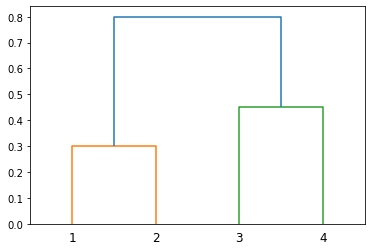

In [261]:
### using complete linkage
observations = np.array([[0,0.3,0.4,0.7],[0.3,0,0.5,0.8],[0.4,0.5,0,0.45],[0.7,0.8,0.45,0]])
dist = squareform(observations)
link = linkage(dist, 'complete')
dendrogram(link,orientation='top', labels=[1,2,3,4],show_leaf_counts=True)
plt.show()

#### (b) Repeat (a), this time using single linkage clustering.

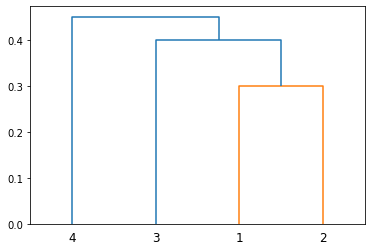

In [264]:
### using single linkage
link = linkage(dist, 'single')
dendrogram(link,orientation='top', labels=[1,2,3,4],show_leaf_counts=True)
plt.show()

#### (c) Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?

ans: a is using complete linkage, we will have two clusters.

    In cluster 1, we have 1,2.
    
    In cluster 2, we have 3,4.

#### (d) Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?

ans: for the single linkage, we will have two clusters.
    
    In cluster 1, we have ((1,2),3).
    
    In cluster 2, we have 4.

#### (e) It is mentioned in the chapter that at each fusion in the den- drogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

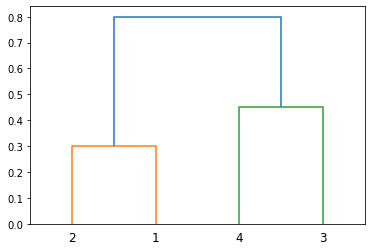

In [265]:
link = linkage(dist, 'complete')
dendrogram(link,orientation='top', labels=[2, 1, 4, 3],show_leaf_counts=True)
plt.show()